In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotsense.explanations.explanationsv2 import refine_plot_explanation
from plotsense.visual_suggestion.Visual_suggestion_v2 import recommend_visualizations

ModuleNotFoundError: No module named 'explanationsv2'

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df = recommend_visualizations(titanic)

In [ ]:
df

,plot_type,variables,rationale,ensemble_score
0,bar chart,"survived, pclass",This chart will help us understand the surviva...,1.0
1,bar chart,"survived, sex",This visualization is valuable because it can ...,0.6
2,scatter plot,"age, fare",This scatter plot will reveal any potential re...,0.5


<Axes: xlabel='survived', ylabel='pclass'>

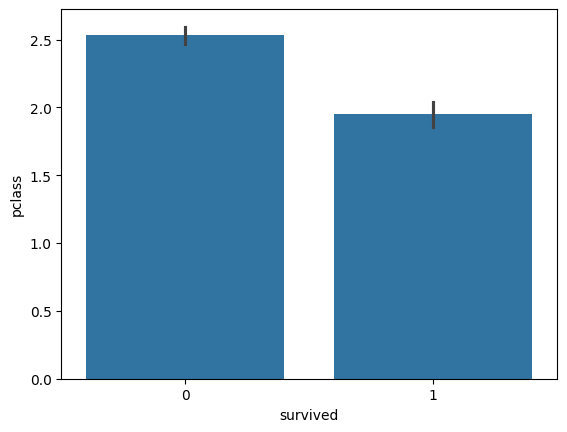

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=titanic, x='survived', y='pclass', ax=ax)

In [ ]:
dd

In [ ]:
explanation = refine_plot_explanation(fig)
print("Generated Explanation:")
print(explanation)

Generated Explanation:
## Improved Explanation

The provided bar graph illustrates the number of passengers over a 12-year period, from 1949 to 1960. The x-axis represents the years, while the y-axis denotes the number of passengers, ranging from 0 to 500 in increments of 100.

### Key Features

* The graph features blue bars for each year, accompanied by black vertical lines indicating the range of values. These vertical lines suggest the variability or uncertainty in the data for each year, although the exact nature (e.g., standard deviation, confidence interval) is not specified.
* The y-axis is labeled "passengers" and ranges from 0 to 500 in increments of 100.
* The x-axis lists the years from 1949 to 1960.

### Trend Analysis

* The graph exhibits a clear upward trend in the number of passengers over the 12-year period, with some fluctuations.
* Starting from approximately 135 passengers in 1949, the number increases steadily, with periods of more rapid growth (e.g., from 1955 to